In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from google.colab import drive

drive.mount('/content/drive')

# Now you can access your Google Drive files in the /content/drive directory
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/Colab Notebooks/HotelLocations.csv'
df = pd.read_csv(file_path)

!pip install k-means-constrained


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,X,Y,Name,HYPERLINK,POSTALCODE,KEEPERNAME,TOTALROOMS,ADDRESS,INC_CRC,FMEL_UPD_D,NAME2
0,103.834076,1.285564,New Cape Inn,NaN,168891,Wong Wai Cheong,76,3 SENG POH ROAD GREEN WORLD,7F64CEFD6C329960,20220713235853,New Cape Inn
1,103.881747,1.313236,New Cathay Hotel (Geylang),newcathayhotel@yahoo.com.sg,389403,Timothy Seah How Ming,53,443A Geylang Road,9A317298E2DC1AFC,20220713235853,New Cathay Hotel (Geylang)
2,103.851039,1.324291,New Orchid Hotel,neworchidhotel@hotmail.com,329777,Lim Lay Meng,68,347 Balestier Road,CF6430A3F11D1978,20220713235853,New Orchid Hotel
3,103.858259,1.310238,New Society Backpacker,newsoc259@gmail.com,208934,Ho Chiuen Sheey,4,259A Jalan Besar,2A49668782EE61A8,20220713235853,New Society Backpacker
4,103.844286,1.284240,1900,enquiry@hotel1900.com.sg,59526,Hu Yingna,134,48 Mosque Street,6007287F44CAA572,20230119093336,1900
...,...,...,...,...,...,...,...,...,...,...,...
424,103.902912,1.303779,Village Hotel Katong,info.vhk@fareast.com.sg,449536,Terence Govinden,229,25 Marine Parade Road,EA762650855235F7,20220713235853,Village Hotel Katong
425,103.819943,1.252260,Village Hotel Sentosa,NaN,99951,Choo Hsiu Lien,606,"10 ARTILLERY AVENUE, # 02-01",3ACCB44215EC6C10,20220713235853,Village Hotel Sentosa
426,103.847113,1.287413,Vintage Inn@Clarke Quay,NaN,59672,GOH KUAN KEAT,5,"33 HONGKONG STREET, # 3-33B",507C9909107BD815,20220713235853,Vintage Inn@Clarke Quay
427,103.834573,1.315648,VIP Hotel,booking@viphotel.com.sg,259895,Nguyen Thi Van Trinh,50,5 Balmoral Crescent,AAFED76C4BA4CC03,20220713235853,VIP Hotel


#DBSCAN
## DBSCAN is used to remove outliers based on distance
hyper parameters:

min_samples: minimum number of samples to make 1 cluster


eps: idk. But lower the value, stricter the distance between nodes.



In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Extract coordinates
coordinates = df[['X', 'Y']].values

# Apply DBSCAN
# Note: We need to tune eps and min_samples for better results.
db = DBSCAN(eps=0.004, min_samples=4).fit(coordinates)
# db = DBSCAN(eps=0.0018, min_samples=4).fit(coordinates)

# Add the cluster labels to the DataFrame
df['Cluster'] = db.labels_

In [ ]:
df

,X,Y,Name,HYPERLINK,POSTALCODE,KEEPERNAME,TOTALROOMS,ADDRESS,INC_CRC,FMEL_UPD_D,NAME2,Cluster
0,103.834076,1.285564,New Cape Inn,NaN,168891,Wong Wai Cheong,76,3 SENG POH ROAD GREEN WORLD,7F64CEFD6C329960,20220713235853,New Cape Inn,0
1,103.881747,1.313236,New Cathay Hotel (Geylang),newcathayhotel@yahoo.com.sg,389403,Timothy Seah How Ming,53,443A Geylang Road,9A317298E2DC1AFC,20220713235853,New Cathay Hotel (Geylang),1
2,103.851039,1.324291,New Orchid Hotel,neworchidhotel@hotmail.com,329777,Lim Lay Meng,68,347 Balestier Road,CF6430A3F11D1978,20220713235853,New Orchid Hotel,2
3,103.858259,1.310238,New Society Backpacker,newsoc259@gmail.com,208934,Ho Chiuen Sheey,4,259A Jalan Besar,2A49668782EE61A8,20220713235853,New Society Backpacker,0
4,103.844286,1.284240,1900,enquiry@hotel1900.com.sg,59526,Hu Yingna,134,48 Mosque Street,6007287F44CAA572,20230119093336,1900,0
...,...,...,...,...,...,...,...,...,...,...,...,...
424,103.902912,1.303779,Village Hotel Katong,info.vhk@fareast.com.sg,449536,Terence Govinden,229,25 Marine Parade Road,EA762650855235F7,20220713235853,Village Hotel Katong,7
425,103.819943,1.252260,Village Hotel Sentosa,NaN,99951,Choo Hsiu Lien,606,"10 ARTILLERY AVENUE, # 02-01",3ACCB44215EC6C10,20220713235853,Village Hotel Sentosa,4
426,103.847113,1.287413,Vintage Inn@Clarke Quay,NaN,59672,GOH KUAN KEAT,5,"33 HONGKONG STREET, # 3-33B",507C9909107BD815,20220713235853,Vintage Inn@Clarke Quay,0
427,103.834573,1.315648,VIP Hotel,booking@viphotel.com.sg,259895,Nguyen Thi Van Trinh,50,5 Balmoral Crescent,AAFED76C4BA4CC03,20220713235853,VIP Hotel,-1


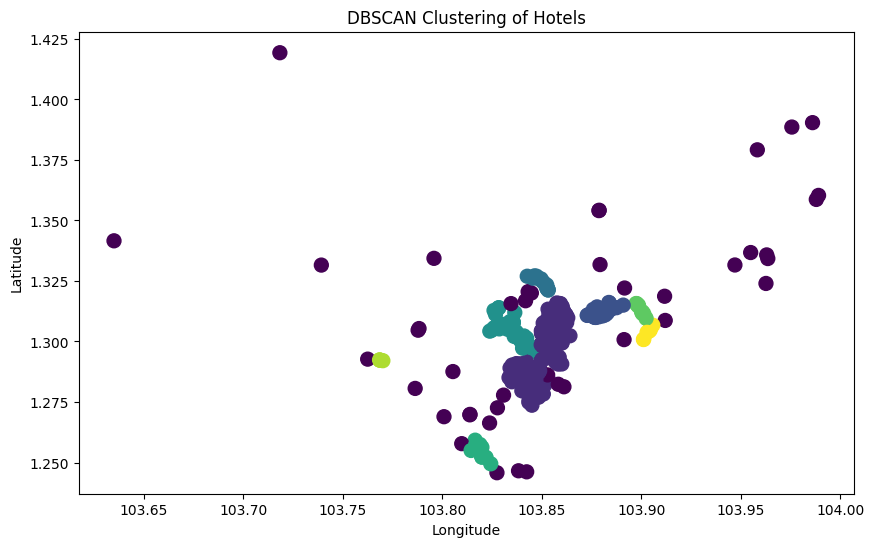

array([ 0,  1,  2,  3, -1,  4,  5,  6,  7])

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis', marker='o', s=100)
plt.title('DBSCAN Clustering of Hotels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for i, row in df.iterrows():
    # plt.text(row['X'], row['Y'], row['Name'], fontsize=9)
    plt.text(row['X'], row['Y'], "", fontsize = 9)
plt.show()

# Display the unique cluster labels
df['Cluster'].unique()


In [ ]:
df.to_csv('hotel_cleaned.csv', index=False)

Remove the "outliers"

In [ ]:
# Remove rows where Cluster value is -1
df = df[df['Cluster'] != -1]

In [ ]:
df

,X,Y,Name,HYPERLINK,POSTALCODE,KEEPERNAME,TOTALROOMS,ADDRESS,INC_CRC,FMEL_UPD_D,NAME2,Cluster
0,103.834076,1.285564,New Cape Inn,NaN,168891,Wong Wai Cheong,76,3 SENG POH ROAD GREEN WORLD,7F64CEFD6C329960,20220713235853,New Cape Inn,0
1,103.881747,1.313236,New Cathay Hotel (Geylang),newcathayhotel@yahoo.com.sg,389403,Timothy Seah How Ming,53,443A Geylang Road,9A317298E2DC1AFC,20220713235853,New Cathay Hotel (Geylang),1
2,103.851039,1.324291,New Orchid Hotel,neworchidhotel@hotmail.com,329777,Lim Lay Meng,68,347 Balestier Road,CF6430A3F11D1978,20220713235853,New Orchid Hotel,2
3,103.858259,1.310238,New Society Backpacker,newsoc259@gmail.com,208934,Ho Chiuen Sheey,4,259A Jalan Besar,2A49668782EE61A8,20220713235853,New Society Backpacker,0
4,103.844286,1.284240,1900,enquiry@hotel1900.com.sg,59526,Hu Yingna,134,48 Mosque Street,6007287F44CAA572,20230119093336,1900,0
...,...,...,...,...,...,...,...,...,...,...,...,...
422,103.857669,1.301928,Village Hotel Bugis,info.vhb@fareast.com.sg,188061,Abdullah Bin Ali,393,390 Victoria Street,8E7B1395C7B0D3E2,20220713235853,Village Hotel Bugis,0
424,103.902912,1.303779,Village Hotel Katong,info.vhk@fareast.com.sg,449536,Terence Govinden,229,25 Marine Parade Road,EA762650855235F7,20220713235853,Village Hotel Katong,7
425,103.819943,1.252260,Village Hotel Sentosa,NaN,99951,Choo Hsiu Lien,606,"10 ARTILLERY AVENUE, # 02-01",3ACCB44215EC6C10,20220713235853,Village Hotel Sentosa,4
426,103.847113,1.287413,Vintage Inn@Clarke Quay,NaN,59672,GOH KUAN KEAT,5,"33 HONGKONG STREET, # 3-33B",507C9909107BD815,20220713235853,Vintage Inn@Clarke Quay,0


k-means test: find elbow value

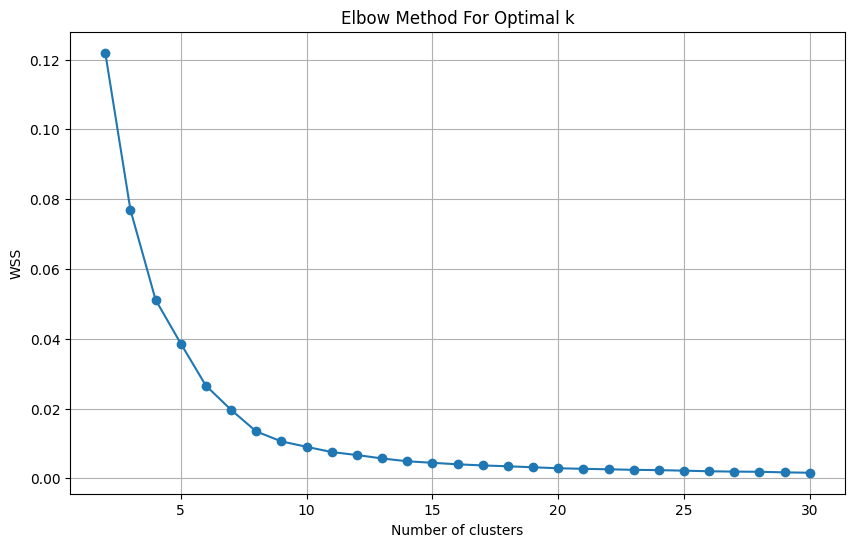

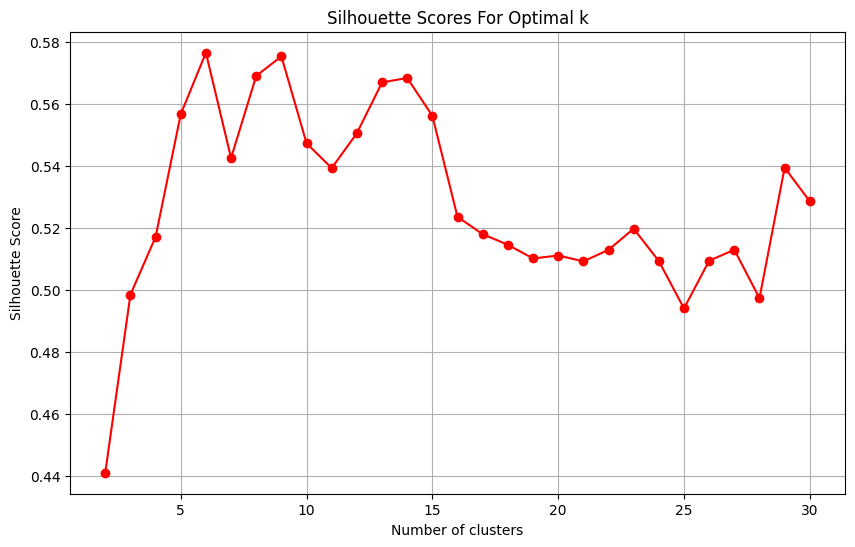

In [ ]:
from sklearn.metrics import silhouette_score
# Elbow Value
# Extract coordinates
coordinates = df[['X', 'Y']]

# Determine the optimal number of clusters using the elbow method
wss = []
silhouette_scores = []
for i in range(2, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(coordinates)
    wss.append(kmeans.inertia_)
    score = silhouette_score(coordinates, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 31), wss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')  # within-cluster sums of squares
plt.grid(True)
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 31), silhouette_scores, marker='o', color='red')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

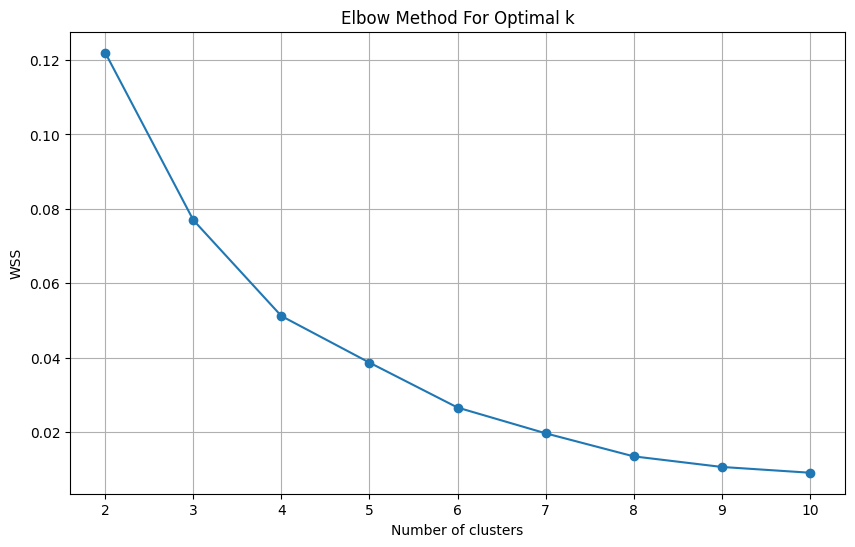

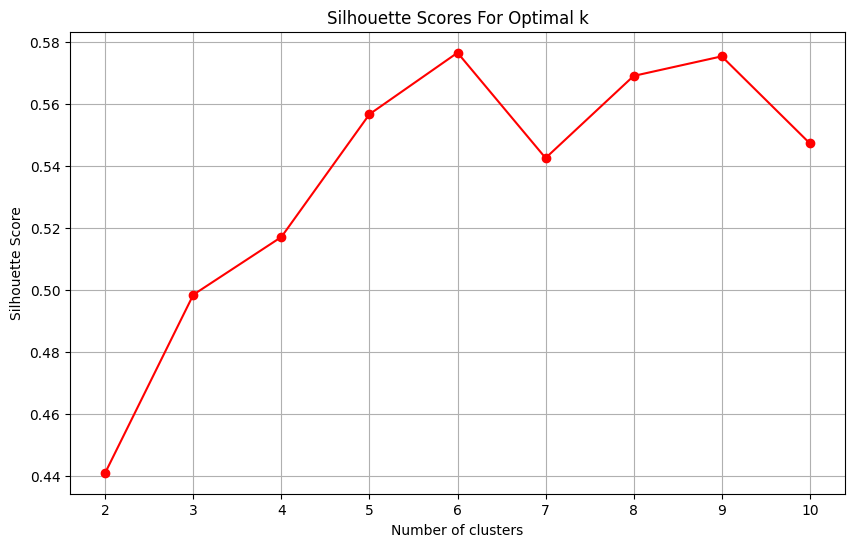

In [ ]:
from sklearn.metrics import silhouette_score

# Extract coordinates
coordinates = df[['X', 'Y']]

# Determine the optimal number of clusters using the elbow method and silhouette score
wss = []
silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters to calculate silhouette score
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(coordinates)
    wss.append(kmeans.inertia_)

    # Calculate silhouette score only if there are at least two clusters
    if i >= 2:
        score = silhouette_score(coordinates, kmeans.labels_)
        silhouette_scores.append(score)

# Plotting the elbow curve for WSS
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')  # within-cluster sums of squares
plt.grid(True)
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
# Optionally, apply k-means with the chosen number of clusters
optimal_clusters = 14

# Based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(coordinates)

# Save or display results
print(df[['Name', 'Cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                           Name  Cluster
0                  New Cape Inn        9
1    New Cathay Hotel (Geylang)        7
2              New Orchid Hotel        8
3        New Society Backpacker        0
4                          1900        1
..                          ...      ...
422         Village Hotel Bugis       10
424        Village Hotel Katong        2
425       Village Hotel Sentosa        5
426     Vintage Inn@Clarke Quay       13
428      voco Orchard Singapore        6

[386 rows x 2 columns]


<ipython-input-13-76c93181529c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(coordinates)


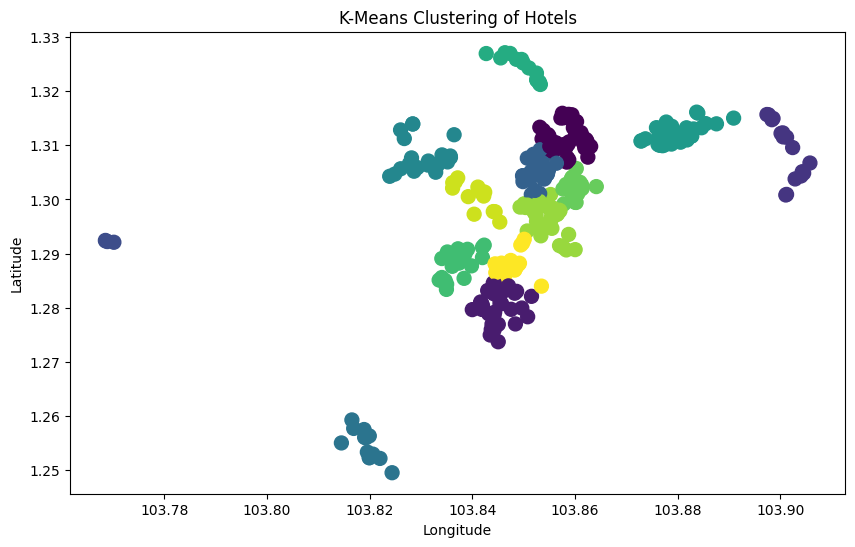

array([ 9,  7,  8,  0,  1, 13, 10, 11, 12,  6,  5,  4,  2,  3],
      dtype=int32)

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering of Hotels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for i, row in df.iterrows():
    # plt.text(row['X'], row['Y'], row['Name'], fontsize=9)
    plt.text(row['X'], row['Y'], "", fontsize = 9)
plt.show()

# Display the unique cluster labels
df['Cluster'].unique()


In [ ]:
print(df['X'].dtype)
print(df['Y'].dtype)

float64
float64


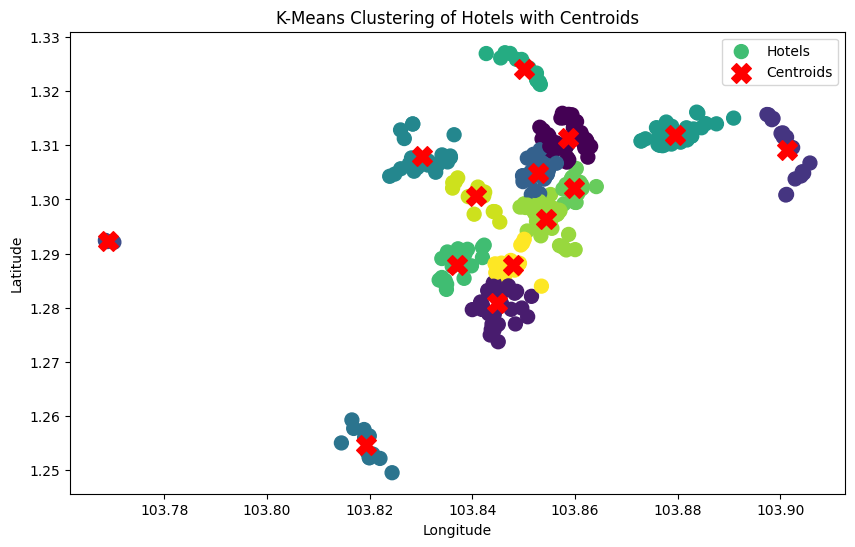

[ 9  7  8  0  1 13 10 11 12  6  5  4  2  3]


In [ ]:
# Calculate centroids of each cluster for visualization
centroids = df.groupby('Cluster')[['X', 'Y']].mean()

# Visualize the clusters and their centroids
plt.figure(figsize=(10, 6))
# Scatter plot for hotels colored by cluster
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis', marker='o', s=100, label='Hotels')

# Plot centroids on the same graph
plt.scatter(centroids['X'], centroids['Y'], c='red', s=200, marker='X', label='Centroids')

# Optionally, add text labels (if you have 'Name' for each hotel)
for i, row in df.iterrows():
    plt.text(row['X'], row['Y'], "", fontsize=9)  # Uncomment and adjust to show names if necessary

plt.title('K-Means Clustering of Hotels with Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Display unique cluster labels
print(df['Cluster'].unique())

In [ ]:
df

,X,Y,Name,HYPERLINK,POSTALCODE,KEEPERNAME,TOTALROOMS,ADDRESS,INC_CRC,FMEL_UPD_D,NAME2,Cluster
0,103.834076,1.285564,New Cape Inn,NaN,168891,Wong Wai Cheong,76,3 SENG POH ROAD GREEN WORLD,7F64CEFD6C329960,20220713235853,New Cape Inn,9
1,103.881747,1.313236,New Cathay Hotel (Geylang),newcathayhotel@yahoo.com.sg,389403,Timothy Seah How Ming,53,443A Geylang Road,9A317298E2DC1AFC,20220713235853,New Cathay Hotel (Geylang),7
2,103.851039,1.324291,New Orchid Hotel,neworchidhotel@hotmail.com,329777,Lim Lay Meng,68,347 Balestier Road,CF6430A3F11D1978,20220713235853,New Orchid Hotel,8
3,103.858259,1.310238,New Society Backpacker,newsoc259@gmail.com,208934,Ho Chiuen Sheey,4,259A Jalan Besar,2A49668782EE61A8,20220713235853,New Society Backpacker,0
4,103.844286,1.284240,1900,enquiry@hotel1900.com.sg,59526,Hu Yingna,134,48 Mosque Street,6007287F44CAA572,20230119093336,1900,1
...,...,...,...,...,...,...,...,...,...,...,...,...
422,103.857669,1.301928,Village Hotel Bugis,info.vhb@fareast.com.sg,188061,Abdullah Bin Ali,393,390 Victoria Street,8E7B1395C7B0D3E2,20220713235853,Village Hotel Bugis,10
424,103.902912,1.303779,Village Hotel Katong,info.vhk@fareast.com.sg,449536,Terence Govinden,229,25 Marine Parade Road,EA762650855235F7,20220713235853,Village Hotel Katong,2
425,103.819943,1.252260,Village Hotel Sentosa,NaN,99951,Choo Hsiu Lien,606,"10 ARTILLERY AVENUE, # 02-01",3ACCB44215EC6C10,20220713235853,Village Hotel Sentosa,5
426,103.847113,1.287413,Vintage Inn@Clarke Quay,NaN,59672,GOH KUAN KEAT,5,"33 HONGKONG STREET, # 3-33B",507C9909107BD815,20220713235853,Vintage Inn@Clarke Quay,13


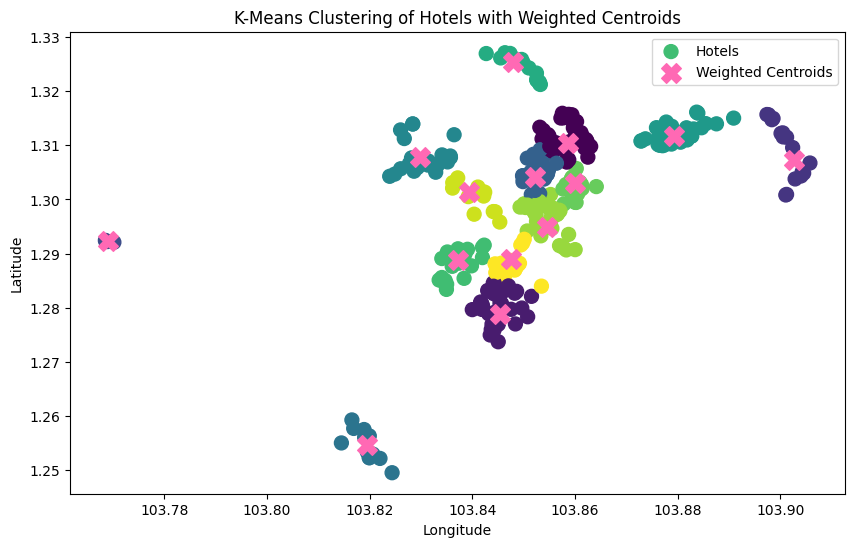

[ 9  7  8  0  1 13 10 11 12  6  5  4  2  3]


In [ ]:
# Calculate the weighted centroids
weighted_centroids = df.groupby('Cluster').apply(
    lambda group: (
        sum(group['X'] * group['TOTALROOMS']) / group['TOTALROOMS'].sum(),
        sum(group['Y'] * group['TOTALROOMS']) / group['TOTALROOMS'].sum()
    )
)

# Convert the results to a more readable DataFrame
weighted_centroids_df = pd.DataFrame(weighted_centroids.tolist(), columns=['X', 'Y'], index=weighted_centroids.index)

# Visualize the clusters and their centroids
plt.figure(figsize=(10, 6))
# Scatter plot for hotels colored by cluster
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis', marker='o', s=100, label='Hotels')

# Plot centroids on the same graph
plt.scatter(weighted_centroids_df['X'], weighted_centroids_df['Y'], c='hotpink', s=200, marker='X', label='Weighted Centroids')

# Optionally, add text labels (if you have 'Name' for each hotel)
for i, row in df.iterrows():
    plt.text(row['X'], row['Y'], "", fontsize=9)  # Uncomment and adjust to show names if necessary

plt.title('K-Means Clustering of Hotels with Weighted Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Display unique cluster labels
print(df['Cluster'].unique())

In [ ]:
# Add find closest point

weighted_centroids_df = pd.DataFrame(weighted_centroids.tolist(), columns=['Weighted_centeroid_X', 'Weighted_centeroid_Y'])
weighted_centroids_df['Cluster'] = weighted_centroids.index
df = df.merge(weighted_centroids_df, on='Cluster', how='left')

In [ ]:
df

,X,Y,Name,HYPERLINK,POSTALCODE,KEEPERNAME,TOTALROOMS,ADDRESS,INC_CRC,FMEL_UPD_D,NAME2,Cluster,Weighted_centeroid_X,Weighted_centeroid_Y
0,103.834076,1.285564,New Cape Inn,NaN,168891,Wong Wai Cheong,76,3 SENG POH ROAD GREEN WORLD,7F64CEFD6C329960,20220713235853,New Cape Inn,9,103.837308,1.288881
1,103.881747,1.313236,New Cathay Hotel (Geylang),newcathayhotel@yahoo.com.sg,389403,Timothy Seah How Ming,53,443A Geylang Road,9A317298E2DC1AFC,20220713235853,New Cathay Hotel (Geylang),7,103.879266,1.311734
2,103.851039,1.324291,New Orchid Hotel,neworchidhotel@hotmail.com,329777,Lim Lay Meng,68,347 Balestier Road,CF6430A3F11D1978,20220713235853,New Orchid Hotel,8,103.847883,1.325396
3,103.858259,1.310238,New Society Backpacker,newsoc259@gmail.com,208934,Ho Chiuen Sheey,4,259A Jalan Besar,2A49668782EE61A8,20220713235853,New Society Backpacker,0,103.858697,1.310483
4,103.844286,1.284240,1900,enquiry@hotel1900.com.sg,59526,Hu Yingna,134,48 Mosque Street,6007287F44CAA572,20230119093336,1900,1,103.845328,1.278902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,103.857669,1.301928,Village Hotel Bugis,info.vhb@fareast.com.sg,188061,Abdullah Bin Ali,393,390 Victoria Street,8E7B1395C7B0D3E2,20220713235853,Village Hotel Bugis,10,103.860029,1.303057
382,103.902912,1.303779,Village Hotel Katong,info.vhk@fareast.com.sg,449536,Terence Govinden,229,25 Marine Parade Road,EA762650855235F7,20220713235853,Village Hotel Katong,2,103.902660,1.307207
383,103.819943,1.252260,Village Hotel Sentosa,NaN,99951,Choo Hsiu Lien,606,"10 ARTILLERY AVENUE, # 02-01",3ACCB44215EC6C10,20220713235853,Village Hotel Sentosa,5,103.819469,1.254569
384,103.847113,1.287413,Vintage Inn@Clarke Quay,NaN,59672,GOH KUAN KEAT,5,"33 HONGKONG STREET, # 3-33B",507C9909107BD815,20220713235853,Vintage Inn@Clarke Quay,13,103.847632,1.288921


In [ ]:

# Calculate the Euclidean distance from each hotel to its cluster's centroid
df['Distance_to_Centroid'] = np.sqrt((df['X'] - df['Weighted_centeroid_X'])**2 + (df['Y'] - df['Weighted_centeroid_Y'])**2)

# Find the closest hotel to the centroid in each cluster
closest_hotels = df.loc[df.groupby('Cluster')['Distance_to_Centroid'].idxmin()]
closest_hotels

,X,Y,Name,HYPERLINK,POSTALCODE,KEEPERNAME,TOTALROOMS,ADDRESS,INC_CRC,FMEL_UPD_D,NAME2,Cluster,Weighted_centeroid_X,Weighted_centeroid_Y,Distance_to_Centroid
60,103.858904,1.310646,BEAT. Sports Hostel,sports@beathostel.co,208953,JEREMY TEO,13,290A Jalan Besar,FEA8E458DDD06100,20220713235853,BEAT. Sports Hostel,0,103.858697,1.310483,0.000264
260,103.844367,1.279152,"Maxwell Reserve Singapore, Autograph Collection",NaN,78857,Harpreet Kaur Bedi,138,2 COOK STREET,EE242E78686CAD95,20230119093336,"Maxwell Reserve Singapore, Autograph Collection",1,103.845328,1.278902,0.000993
377,103.902429,1.309579,Venue Hotel,contact@venuehotel.sg,427556,Chu Poh Yong,81,305 Joo Chiat Road,131753C344D858D8,20220713235853,Venue Hotel,2,103.902660,1.307207,0.002383
297,103.768888,1.292209,ibis budget Singapore West Coast,contact@gphl.com.sg,118759,Sun Yi,57,418 Pasir Panjang Road,0D3FCE03C7534A7B,20220713235853,ibis budget Singapore West Coast,3,103.769083,1.292248,0.000198
40,103.852965,1.304484,Adamson Lodge,query_chris@yahoo.com.sg,208127,Lee Choon Chuan,7,6 Perak Road,FE502164CC10A45A,20220713235853,Adamson Lodge,4,103.852266,1.304066,0.000815
118,103.819558,1.253294,Oasia Resort Sentosa,NaN,98679,Choo Hsiu Lien,191,"23 BEACH VIEW LE MERIDIEN SINGAPORE, SENTOSA",601E97AEE81108EC,20220713235853,Oasia Resort Sentosa,5,103.819469,1.254569,0.001279
119,103.828164,1.307669,Orchard Hotel Singapore,NaN,238879,Wong On Tat Andy,656,442 Orchard Road,B8CCD00C487D6E94,20220713235853,Orchard Hotel Singapore,6,103.829857,1.307845,0.001702
293,103.879289,1.311561,ibis budget Singapore Pearl,contact@gphl.com.sg,398961,GAN KUAN YEW,129,21 Lorong 14 Geylang,298ADD99044225EB,20220713235853,ibis budget Singapore Pearl,7,103.879266,1.311734,0.000175
231,103.848605,1.325887,Fragrance Hotel - Oasis,contact@gphl.com.sg,329816,SUN YI,35,435 Balestier Road,3485C421D4DF7A4A,20220713235853,Fragrance Hotel - Oasis,8,103.847883,1.325396,0.000873
279,103.837473,1.289202,The Warehouse Hotel,NaN,169628,Simeon Chi Kit Tse,37,320 HAVELOCK ROAD,D1008FC9FFCCC158,20230119093336,The Warehouse Hotel,9,103.837308,1.288881,0.000361


In [ ]:
closest_hotels.to_csv('hotel_dropoffpoints.csv', index=False)

In [ ]:
df.to_csv('hotel_clusters_final.csv', index=False)

K-Means test (depreciated)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'X', 'Y', and 'TotalRooms' are the relevant columns
# Extract features for clustering
X = df[['X', 'Y']]

# Number of clusters
n_clusters = 3

# Perform initial k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Initial Cluster'] = kmeans.fit_predict(X)

# Calculate the total number of rooms in each initial cluster
initial_cluster_totals = df.groupby('Initial Cluster')['TOTALROOMS'].sum().values
print("Initial Cluster Totals:", initial_cluster_totals)


Initial Cluster Totals: [20751  6756 38871]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-7-314898fa0953>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Initial Cluster'] = kmeans.fit_predict(X)


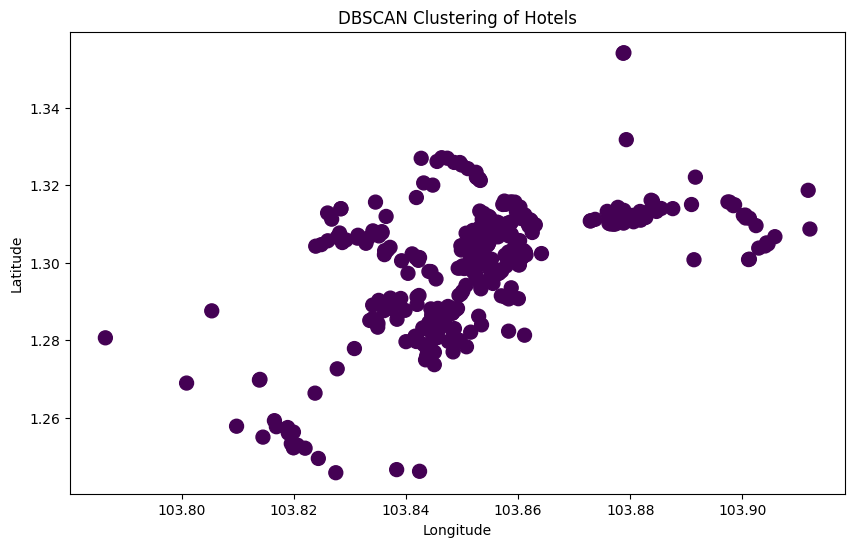

array([0])

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis', marker='o', s=100)
plt.title('DBSCAN Clustering of Hotels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for i, row in df.iterrows():
    # plt.text(row['X'], row['Y'], row['Name'], fontsize=9)
    plt.text(row['X'], row['Y'], "", fontsize = 9)
plt.show()

# Display the unique cluster labels
df['Cluster'].unique()

<ipython-input-9-b28ec1a6baf1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balanced Cluster'] = balanced_clusters


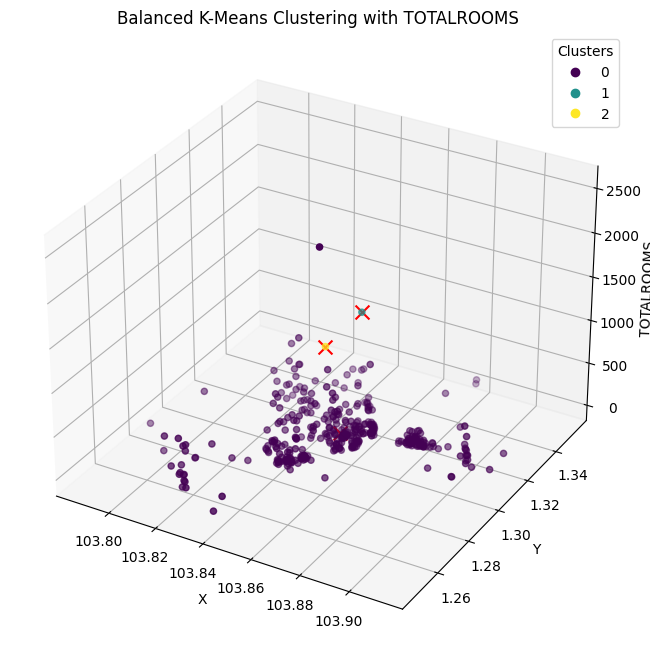

In [ ]:
from scipy.optimize import linear_sum_assignment
import numpy as np

# Define a cost matrix for reassigning points to balance clusters
cost_matrix = np.abs(initial_cluster_totals[:, None] - df['TOTALROOMS'].values)

# Solve the assignment problem to balance the clusters
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Create a balanced cluster assignment
balanced_clusters = np.zeros(df.shape[0], dtype=int)
for i, j in zip(row_ind, col_ind):
    balanced_clusters[j] = i

df['Balanced Cluster'] = balanced_clusters

# Plot the clustered data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['X'], df['Y'], df['TOTALROOMS'], c=df['Balanced Cluster'], cmap='viridis', marker='o')

# Optionally, plot the cluster centers
for cluster_id in range(n_clusters):
    cluster_points = df[df['Balanced Cluster'] == cluster_id]
    center_x = cluster_points['X'].mean()
    center_y = cluster_points['Y'].mean()
    center_rooms = cluster_points['TOTALROOMS'].mean()
    ax.scatter(center_x, center_y, center_rooms, c='red', s=100, marker='x')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('TOTALROOMS')
ax.set_title('Balanced K-Means Clustering with TOTALROOMS')

# Show plot with legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [ ]:
balanced_cluster_totals = df.groupby('Balanced Cluster')['TOTALROOMS'].sum()
balanced_cluster_totals

Balanced Cluster
0    63626
1     1500
2     1252
Name: TOTALROOMS, dtype: int64

Test


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Example DataFrame
data = {'X': [1, 2, 3, 4, 5],
        'Y': [1, 2, 3, 4, 5],
        'TOTALROOMS': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Extract features
X = df[['X', 'Y']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Calculate average TOTALROOMS in each cluster
average_totalrooms = df.groupby('Cluster')['TOTALROOMS'].mean()
print(average_totalrooms)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0    45.0
1    20.0
Name: TOTALROOMS, dtype: float64


In [ ]:
!pip install k-means-constrained

In [ ]:
from k_means_constrained import KMeansConstrained

# Example DataFrame
data = {'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Y': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'TOTALROOMS': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
df = pd.DataFrame(data)

# Extract features
X = df[['X', 'Y']]

# Define number of clusters
n_clusters = 2

# Ensure the size constraints are correct
size_per_cluster = len(df) // n_clusters

# Perform balanced k-means clustering
kmeans_balanced = KMeansConstrained(
    n_clusters=n_clusters,
    size_min=size_per_cluster,
    size_max=size_per_cluster + (len(df) % n_clusters),
    random_state=0
)

# Fit the model and predict the cluster for each sample
df['Cluster'] = kmeans_balanced.fit_predict(X)

# Calculate average TOTALROOMS in each cluster
average_totalrooms = df.groupby('Cluster')['TOTALROOMS'].mean()
print(average_totalrooms)


Cluster
0    30.0
1    80.0
Name: TOTALROOMS, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

# Example DataFrame
data = {'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Y': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'TOTALROOMS': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
df = pd.DataFrame(data)

# Extract features
X = df[['X', 'Y']].values
total_rooms = df['TOTALROOMS'].values

# Number of clusters
k = 2
n = len(X)
size_per_cluster = n // k

# Initialize centroids randomly
centroids = X[np.random.choice(n, k, replace=False)]

def balanced_kmeans(X, centroids, k, max_iter=100):
    for iteration in range(max_iter):
        # Calculate distances between points and centroids
        distances = euclidean_distances(X, centroids)

        # Assign points to the nearest centroid, ensuring balance
        labels = np.zeros(n, dtype=int)
        cluster_sizes = [0] * k
        for i in np.argsort(distances, axis=None):
            point_idx = i // k
            cluster_idx = i % k
            if cluster_sizes[cluster_idx] < size_per_cluster:
                labels[point_idx] = cluster_idx
                cluster_sizes[cluster_idx] += 1

        # Recalculate centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

# Run the balanced k-means algorithm
labels, centroids = balanced_kmeans(X, centroids, k)

# Assign labels to DataFrame
df['Cluster'] = labels

# Calculate average TOTALROOMS in each cluster
average_totalrooms = df.groupby('Cluster')['TOTALROOMS'].mean()
print(df)
print(average_totalrooms)


    X   Y  TOTALROOMS  Cluster
0   1   1          10        0
1   2   2          20        0
2   3   3          30        0
3   4   4          40        0
4   5   5          50        0
5   6   6          60        0
6   7   7          70        1
7   8   8          80        1
8   9   9          90        1
9  10  10         100        1
Cluster
0    35.0
1    85.0
Name: TOTALROOMS, dtype: float64


MAFIA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# Preprocess Data: Normalize X and Y
scaler = StandardScaler()
df[['X', 'Y']] = scaler.fit_transform(df[['X', 'Y']])

# MAFIA Algorithm Placeholder (assuming mafia_clustering is the implemented MAFIA function)
# Replace this with actual MAFIA algorithm code
def mafia_clustering(data):
    # Pseudocode: Replace with actual MAFIA implementation
    # This should return cluster labels for each point in data
    cluster_labels = np.random.randint(0, 5, len(data))  # Dummy cluster labels
    return cluster_labels

# Apply MAFIA Algorithm
df['cluster_mafia'] = mafia_clustering(df[['X', 'Y']])

# Calculate Average TOTALROOMS for each cluster
cluster_averages = df.groupby('cluster_mafia')['TOTALROOMS'].mean().reset_index()

print(cluster_averages)


   cluster_mafia  TOTALROOMS
0              0  182.000000
1              1  178.543210
2              2  144.833333
3              3  131.644737
4              4  172.202247


<ipython-input-33-f14292b16a44>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['X', 'Y']] = scaler.fit_transform(df[['X', 'Y']])
<ipython-input-33-f14292b16a44>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_mafia'] = mafia_clustering(df[['X', 'Y']])


In [ ]:
df

,X,Y,Name,HYPERLINK,POSTALCODE,KEEPERNAME,TOTALROOMS,ADDRESS,INC_CRC,FMEL_UPD_D,NAME2,Cluster,cluster_mafia
0,-1.090699,-0.889175,New Cape Inn,NaN,168891,Wong Wai Cheong,76,3 SENG POH ROAD GREEN WORLD,7F64CEFD6C329960,20220713235853,New Cape Inn,0,2
1,1.383151,0.825879,New Cathay Hotel (Geylang),newcathayhotel@yahoo.com.sg,389403,Timothy Seah How Ming,53,443A Geylang Road,9A317298E2DC1AFC,20220713235853,New Cathay Hotel (Geylang),0,3
2,-0.210395,1.511086,New Orchid Hotel,neworchidhotel@hotmail.com,329777,Lim Lay Meng,68,347 Balestier Road,CF6430A3F11D1978,20220713235853,New Orchid Hotel,0,0
3,0.164274,0.640074,New Society Backpacker,newsoc259@gmail.com,208934,Ho Chiuen Sheey,4,259A Jalan Besar,2A49668782EE61A8,20220713235853,New Society Backpacker,0,3
4,-0.560883,-0.971267,1900,enquiry@hotel1900.com.sg,59526,Hu Yingna,134,48 Mosque Street,6007287F44CAA572,20230119093336,1900,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2.481488,0.239777,Village Hotel Katong,info.vhk@fareast.com.sg,449536,Terence Govinden,229,25 Marine Parade Road,EA762650855235F7,20220713235853,Village Hotel Katong,0,0
425,-1.824090,-2.953373,Village Hotel Sentosa,NaN,99951,Choo Hsiu Lien,606,"10 ARTILLERY AVENUE, # 02-01",3ACCB44215EC6C10,20220713235853,Village Hotel Sentosa,0,3
426,-0.414170,-0.774575,Vintage Inn@Clarke Quay,NaN,59672,GOH KUAN KEAT,5,"33 HONGKONG STREET, # 3-33B",507C9909107BD815,20220713235853,Vintage Inn@Clarke Quay,0,4
427,-1.064899,0.975367,VIP Hotel,booking@viphotel.com.sg,259895,Nguyen Thi Van Trinh,50,5 Balmoral Crescent,AAFED76C4BA4CC03,20220713235853,VIP Hotel,0,2


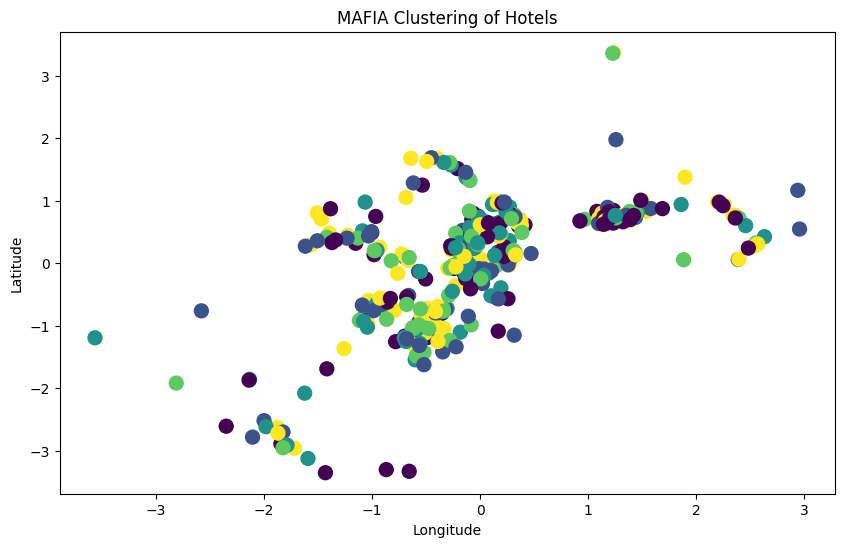

array([2, 3, 0, 1, 4])

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c=df['cluster_mafia'], cmap='viridis', marker='o', s=100)
plt.title('MAFIA Clustering of Hotels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for i, row in df.iterrows():
    # plt.text(row['X'], row['Y'], row['Name'], fontsize=9)
    plt.text(row['X'], row['Y'], "", fontsize = 9)
plt.show()

# Display the unique cluster labels
df['cluster_mafia'].unique()

Elbow method for MAFIA

<ipython-input-39-be1ee3b6e221>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['X', 'Y']] = scaler.fit_transform(df[['X', 'Y']])


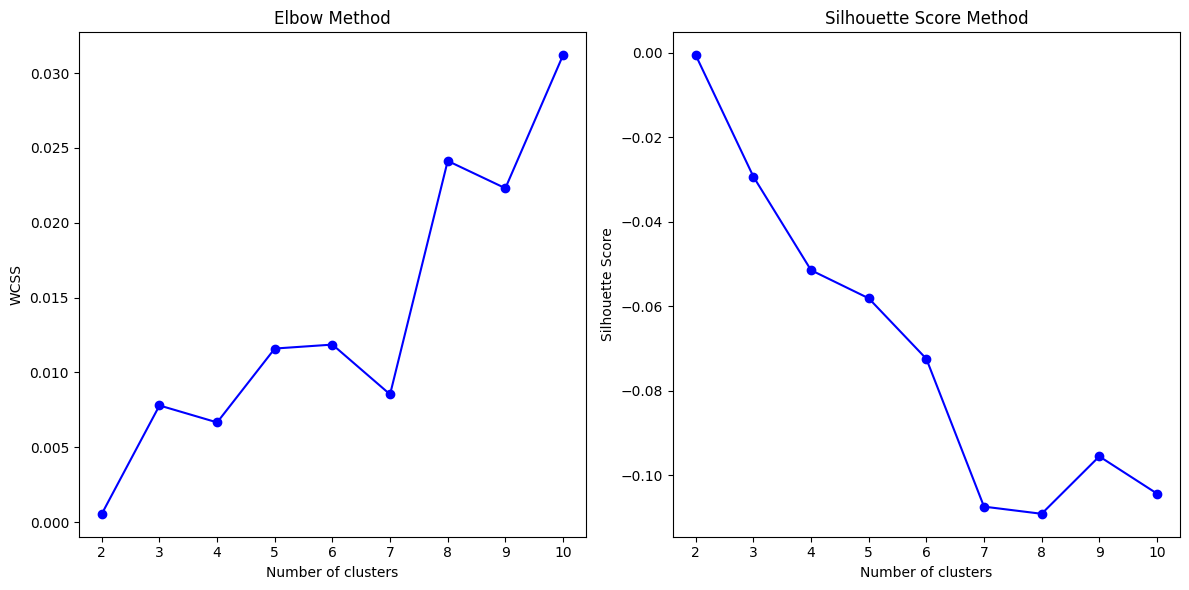

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preprocess Data: Normalize X and Y
scaler = StandardScaler()
df[['X', 'Y']] = scaler.fit_transform(df[['X', 'Y']])

# Placeholder function to simulate MAFIA clustering
def simulate_mafia_clustering(data, n_clusters):
    np.random.seed(42)  # For reproducibility
    return np.random.randint(0, n_clusters, len(data))

# Determine optimal number of clusters using Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    cluster_labels = simulate_mafia_clustering(df[['X', 'Y']], k)
    # Calculate WCSS
    wcss.append(sum(np.min(np.sum((df[['X', 'Y']].values - np.mean(df[['X', 'Y']].values[cluster_labels == i], axis=0)) ** 2, axis=1)) for i in range(k)))
    # Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(df[['X', 'Y']], cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()
